# 读取图片进行路径规划
* 提取图片边缘作为路径规划基础点
* 用矩形四边判断图片最外轮廓
* 判断图片内部连通区域

## 导入skimage进行图像处理

In [50]:
%matplotlib inline
import numpy as np
from skimage import io,filters,morphology,measure,segmentation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## 读取图片

图片像素为： (799, 1024)


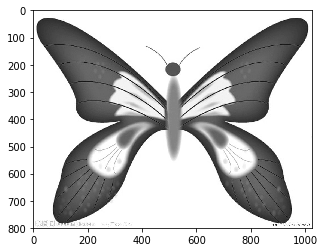

In [64]:
img = io.imread("C:/Users/OC/Pictures/butterfly.jpg",as_grey=True) # 读取RGB图像的灰度图
x = img.shape[0]    # 行数
y = img.shape[1]    # 列数
print('图片像素为：',img.shape)
plt.imshow(img,plt.cm.gray)

## 连通区域判断

连通区域个数： 11


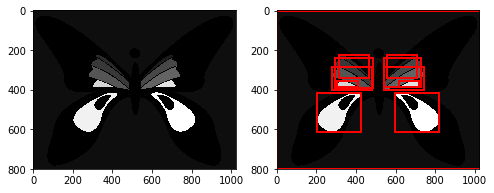

In [63]:
thresh = filters.threshold_otsu(img) # 最大类间方差法计算分割阈值
img = morphology.closing(img>thresh,morphology.square(3)) # 返回图像的灰度形态闭合，形态闭合是先膨胀后腐蚀，为了“关闭”明亮区域中的黑色间隙
segmentation.clear_border(img) # 清除与边界相连的区域
labels = measure.label(img) # 取出连通区域
labels = morphology.remove_small_objects(labels,min_size=1000) # 删除小块区域
regions = measure.regionprops(labels)

print('连通区域个数：',len(regions))
fig,(ax0,ax1)= plt.subplots(1,2, figsize=(8, 6))
ax0.imshow(labels,plt.cm.gray)
for region in regions: #循环得到每一个连通区域属性集
    #绘制外包矩形
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
ax1.imshow(labels,plt.cm.gray)

## 提取连通区域边缘

Text(0.5,1,'contours')

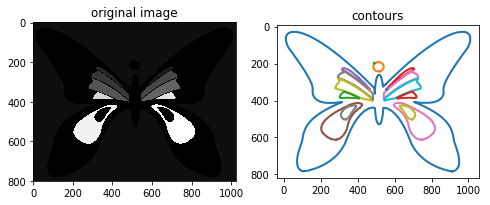

In [69]:
#检测所有图形的轮廓
contours = measure.find_contours(labels, 0.5)

#绘制轮廓
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(labels,plt.cm.gray)
ax0.set_title('original image')

rows,cols=img.shape
ax1.axis([0,rows,cols,0])
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('image')
ax1.set_title('contours')

## 路径规划
* 按照连通区域边缘和索引绘图